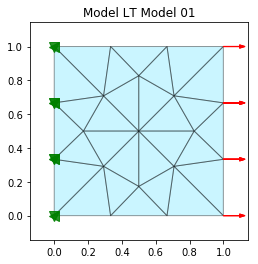

In [7]:
%matplotlib inline
from nusa import *
import nusa.mesh as nmsh

md = nmsh.Modeler()
BB, ES = 1, 1/3
a = md.add_rectangle((0,0),(BB,BB), esize=ES)
nc, ec = md.generate_mesh()
x,y = nc[:,0], nc[:,1]

nodos = []
elementos = []

for k,nd in enumerate(nc):
    cn = Node((x[k],y[k]))
    nodos.append(cn)
    
for k,elm in enumerate(ec):
    i,j,m = int(elm[0]),int(elm[1]),int(elm[2])
    ni,nj,nm = nodos[i],nodos[j],nodos[m]
    ce = LinearTriangle((ni,nj,nm),200e9,0.3,0.25)
    elementos.append(ce)

m = LinearTriangleModel()
for node in nodos: m.add_node(node)
for elm in elementos: m.add_element(elm)
    
# Aplicando condiciones de frontera en los extremos
minx, maxx = min(x), max(x)
miny, maxy = min(y), max(y)

P = 100e3/((BB/ES)+1)

for node in nodos:
    if node.x == minx:
        m.add_constraint(node, ux=0, uy=0)
    if node.x == maxx:
        m.add_force(node, (P,0))

m.plot_model()
m.solve()

In [8]:
len(nodos)

21

In [9]:
ec

array([[ 3, 13,  9],
       [ 0, 14, 11],
       [ 3, 10, 13],
       [ 0,  4, 14],
       [ 2,  8, 15],
       [ 2, 15,  7],
       [ 1,  6, 16],
       [ 1, 16,  5],
       [12, 14, 17],
       [12, 13, 18],
       [12, 18, 14],
       [12, 20, 13],
       [12, 17, 16],
       [12, 19, 15],
       [12, 16, 19],
       [12, 15, 20],
       [ 4,  5, 17],
       [ 6,  7, 19],
       [10, 11, 18],
       [ 8,  9, 20],
       [10, 18, 13],
       [ 8, 20, 15],
       [ 4, 17, 14],
       [ 6, 19, 16],
       [11, 14, 18],
       [ 9, 13, 20],
       [ 5, 16, 17],
       [ 7, 15, 19]])